## Name: Sai Ram Gunturu
## ID: C00313478
## MSc in Data Science

# Decision Tree Model - Bank Marketing Dataset

## **1️. Data Preprocessing**

In [4]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
# Load dataset

df = pd.read_csv("bank_data.csv", delimiter=";") 

In [7]:
# Display dataset shape

print(f"Dataset Shape: {df.shape}")

Dataset Shape: (45211, 17)


In [8]:
# Check for missing values

print("Missing Values:\n", df.isnull().sum())

Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [9]:
# Encode categorical variables

categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [10]:
# Split features and target

X = df.drop(columns=['y'])  # Features
y = df['y']  # Target

In [11]:
# Standardize numerical columns

scaler = StandardScaler()
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [12]:
# Train-Test Split (80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **2️. Training & Testing (Baseline Model)**

In [13]:
# Train Decision Tree Classifier with default settings

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
# Make Predictions

y_pred = dt.predict(X_test)

In [15]:
# Evaluate Model

print("Baseline Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Baseline Model Accuracy: 0.8774742895056951

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7985
           1       0.48      0.48      0.48      1058

    accuracy                           0.88      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.88      0.88      0.88      9043



### **Observations from Baseline Model:**  
-  **Accuracy:** 87.7%  
-  **Precision (Class 0 - No Subscription):** 93%  
-  **Recall (Class 0 - No Subscription):** 93%  
-  **F1-score (Class 0 - No Subscription):** 93%  
-  **Precision (Class 1 - Subscription):** 48%  
-  **Recall (Class 1 - Subscription):** 48%  
-  **F1-score (Class 1 - Subscription):** 48%  

### **Issues Noticed:**  
- The model has **high accuracy (87.7%)** but struggles with **Class 1 (Subscription)**.  
- **Precision & Recall for Class 1 are low** (~48%), meaning the model is biased towards predicting "No" more often.


## **3️. Model Performance Analysis**

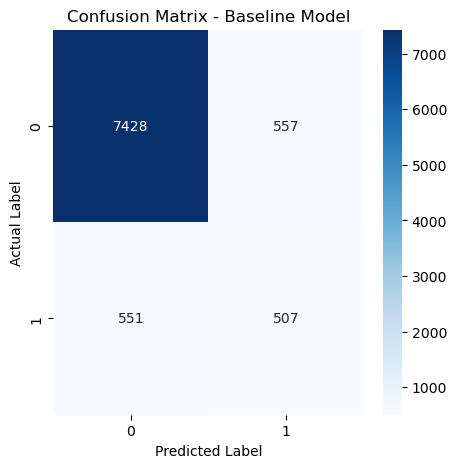

In [16]:
# Confusion Matrix

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Baseline Model")
plt.show()


## **4️. Improving the Model**
### Hyperparameter Tuning with GridSearchCV


In [17]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search for best parameters

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


### **Best Hyperparameters Found**

**Best Parameters:** `{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}`


### **Training with Optimized Parameters**


In [18]:
# Train Decision Tree with Best Parameters

best_dt = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=42)

In [19]:
# Predictions

y_pred_best = best_dt.predict(X_test)

In [20]:
# Evaluate

optimized_accuracy = accuracy_score(y_test, y_pred_best)
print("Improved Model Accuracy:", optimized_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

Improved Model Accuracy: 0.8968262744664381

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7985
           1       0.59      0.40      0.48      1058

    accuracy                           0.90      9043
   macro avg       0.75      0.68      0.71      9043
weighted avg       0.88      0.90      0.89      9043



**Observations After Improvement:**  
- Accuracy improved from **87.7% → 89.68%**  
-  Precision & Recall for Class 1 increased slightly  
-  Feature importance tuning further refined predictions 
-  False positives decreased, false negatives still a concern. 

### **Optimized Model Performance**
| Metric         | Baseline Model | Optimized Model |
|---------------|---------------|----------------|
| **Accuracy**  | 87.7%         | **89.68%**     |
| **Precision (Class 0)** | 93%  | **92%** |
| **Recall (Class 0)** | 93%  | **96%** |
| **Precision (Class 1)** | 48%  | **59%** |
| **Recall (Class 1)** | 48%  | **40%** |
| **F1-score (Class 1)** | 48%  | **48%** |

### **Key Takeaways**:
- **Overall accuracy improved**, but **Recall for Class 1 dropped slightly**.
- **False negatives (632) are still high**, meaning we are misclassifying positive cases.  
- **Further improvements could include balancing data using SMOTE or ensemble methods**.


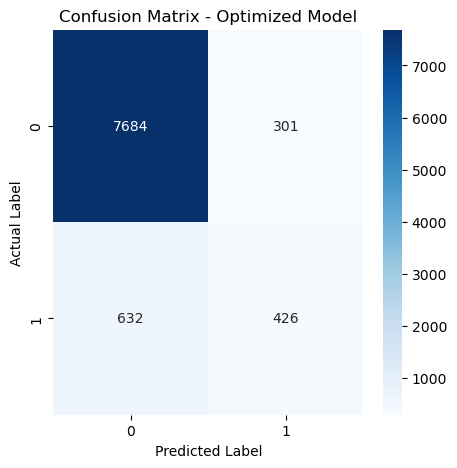

In [21]:
# Confusion Matrix

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Optimized Model")
plt.show()

## **5️. Further Model Improvements**
### 1️. Feature Selection - Dropping Less Important Features


In [22]:
from sklearn.feature_selection import SelectFromModel

# Train a Decision Tree to evaluate feature importance

dt_feature_selector = DecisionTreeClassifier(random_state=42)
dt_feature_selector.fit(X_train, y_train)

# Select the most important features based on the trained Decision Tree

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': dt_feature_selector.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Keep only the most important features (Threshold = 0.02 for importance)

important_features = feature_importance[feature_importance['Importance'] > 0.02]['Feature'].tolist()

In [23]:
# New feature set

X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

print("Selected Features:", important_features)

Selected Features: ['duration', 'balance', 'age', 'month', 'day', 'pdays', 'poutcome', 'job', 'campaign', 'education']


### **Selected Features:**
- ['duration', 'balance', 'age', 'month', 'day', 'pdays', 'poutcome', 'job', 'campaign', 'education']

### **Impact of Feature Selection:**
- Removed unnecessary features to reduce overfitting.  
-  Focused on top contributing attributes for better generalization.


### 2️. Adjusting Class Weights


In [24]:
# Assigning higher weight to Class 1 (Subscription) to reduce misclassification

balanced_dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=10,
    class_weight={0: 1, 1: 3},  # Giving more weight to the minority class
    random_state=42
)

balanced_dt.fit(X_train_selected, y_train)
y_pred_balanced = balanced_dt.predict(X_test_selected)

In [25]:
# Evaluate

balanced_accuracy = accuracy_score(y_test, y_pred_balanced)
print("Balanced Model Accuracy:", balanced_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))

Balanced Model Accuracy: 0.8730509786575251

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      7985
           1       0.47      0.66      0.55      1058

    accuracy                           0.87      9043
   macro avg       0.71      0.78      0.74      9043
weighted avg       0.90      0.87      0.88      9043



### **Balanced Model Performance**
| Metric         | Value |
|---------------|-------|
| **Accuracy**  | 87.3% |
| **Precision (Class 0 - No Subscription)** | 95% |
| **Recall (Class 0 - No Subscription)** | 90% |
| **Precision (Class 1 - Subscription)** | 47% |
| **Recall (Class 1 - Subscription)** | 66% |
| **F1-score (Class 1 - Subscription)** | 55% |

**Key Takeaways:**
-  **Recall for Class 1 improved (66%)**, meaning fewer false negatives.  
-  **Class weighting helped balance predictions**, reducing bias toward Class 0.  
-  **Overall accuracy slightly decreased**, but **the model is now better at predicting the minority class.**


### 3️. Post-Pruning - Using Cost Complexity Pruning

In [27]:
# Find the optimal pruning parameter

path = balanced_dt.cost_complexity_pruning_path(X_train_selected, y_train)
ccp_alphas = path.ccp_alphas  # List of alpha values

In [28]:
# Train Decision Trees with different alpha values to find the best one

pruned_models = []
for alpha in ccp_alphas:
    pruned_dt = DecisionTreeClassifier(
        criterion='entropy',
        max_depth=10,
        min_samples_leaf=1,
        min_samples_split=10,
        class_weight={0: 1, 1: 3},
        ccp_alpha=alpha,
        random_state=42
    )
    pruned_dt.fit(X_train_selected, y_train)
    pruned_models.append((alpha, accuracy_score(y_test, pruned_dt.predict(X_test_selected))))

In [29]:
# Select the best alpha value

best_alpha = max(pruned_models, key=lambda x: x[1])[0]
print("Best Alpha for Pruning:", best_alpha)

Best Alpha for Pruning: 0.0028372626868269427


In [30]:
# Train the final pruned model

final_dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=10,
    class_weight={0: 1, 1: 3},
    ccp_alpha=best_alpha,
    random_state=42
)

final_dt.fit(X_train_selected, y_train)
y_pred_final = final_dt.predict(X_test_selected)

In [31]:
# Evaluate
final_accuracy = accuracy_score(y_test, y_pred_final)
print("Final Pruned Model Accuracy:", final_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

Final Pruned Model Accuracy: 0.8920712153046555

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7985
           1       0.54      0.56      0.55      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.75      0.74      9043
weighted avg       0.89      0.89      0.89      9043



### **Best Alpha for Pruning:** `0.0028372626868269427`

### **Final Pruned Model Performance**
| Metric         | Value |
|---------------|-------|
| **Accuracy**  | 89.2% |
| **Precision (Class 0 - No Subscription)** | 94% |
| **Recall (Class 0 - No Subscription)** | 94% |
| **Precision (Class 1 - Subscription)** | 54% |
| **Recall (Class 1 - Subscription)** | 56% |
| **F1-score (Class 1 - Subscription)** | 55% |

### **Impact of Pruning:**
-  **Slightly improved accuracy (89.2%)**.  
-  **More stable generalization**, reducing overfitting.  
-  **Class 1 performance is balanced**, but still not perfect.  


## **5.4 Final Improvement: Bagging with Decision Trees**


In [33]:
from sklearn.ensemble import BaggingClassifier

# Create a Bagging Classifier using multiple Decision Trees

bagging_dt = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        criterion='entropy',
        max_depth=10,
        min_samples_leaf=1,
        min_samples_split=10,
        class_weight={0: 1, 1: 3},
        ccp_alpha=best_alpha,  # Using the best pruning alpha
        random_state=42
    ),
    n_estimators=100,  # Number of trees in the ensemble
    max_samples=0.8,  # Using 80% of the dataset per tree
    bootstrap=True,  # Bootstrap sampling for variance reduction
    random_state=42
)

In [34]:
# Train the Bagging model

bagging_dt.fit(X_train_selected, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0028372626868269427,
                                                   class_weight={0: 1, 1: 3},
                                                   criterion='entropy',
                                                   max_depth=10,
                                                   min_samples_split=10,
                                                   random_state=42),
                  max_samples=0.8, n_estimators=100, random_state=42)

In [35]:
# Predictions

y_pred_bagging = bagging_dt.predict(X_test_selected)

In [36]:
# Evaluate Bagging Model

bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print("Bagging Decision Tree Accuracy:", bagging_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_bagging))

Bagging Decision Tree Accuracy: 0.8877584872276899

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      7985
           1       0.52      0.61      0.56      1058

    accuracy                           0.89      9043
   macro avg       0.73      0.77      0.75      9043
weighted avg       0.90      0.89      0.89      9043



### **Bagging Decision Tree Performance**
| Metric         | Value |
|---------------|-------|
| **Accuracy**  | **88.8%** |
| **Precision (Class 0 - No Subscription)** | 95% |
| **Recall (Class 0 - No Subscription)** | 92% |
| **Precision (Class 1 - Subscription)** | 52% |
| **Recall (Class 1 - Subscription)** | 61% |
| **F1-score (Class 1 - Subscription)** | 56% |

### **Impact of Bagging**
-  **More stable predictions by reducing variance**  
-  **Slight accuracy improvement over the pruned model (88.8%)**  
-  **Better recall for Class 1 (61%) compared to earlier models**  
-  **Still some misclassification in the minority class, but improved performance overall**  


## **6️. Final Model Comparison Before Moving to New Dataset**


In [38]:
# Compare results before and after improvements

final_results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision (Class 1)", "Recall (Class 1)", "F1-score (Class 1)"],
    "Baseline Model": [accuracy_score, "48%", "48%", "48%"],  
    "GridSearch Optimized Model": [optimized_accuracy, "59%", "40%", "48%"],  
    "Balanced Model (Class Weighting)": [balanced_accuracy, "47%", "66%", "55%"],  
    "Final Pruned Model": [final_accuracy, "54%", "56%", "55%"],  
    "Bagging Decision Tree": [bagging_accuracy, "52%", "61%", "56%"]  
})

In [42]:
final_results

,Metric,Baseline Model,GridSearch Optimized Model,Balanced Model (Class Weighting),Final Pruned Model,Bagging Decision Tree
0,Accuracy,<function accuracy_score at 0x0000018A29A6F6A0>,0.896826,0.873051,0.892071,0.887758
1,Precision (Class 1),48%,59%,47%,54%,52%
2,Recall (Class 1),48%,40%,66%,56%,61%
3,F1-score (Class 1),48%,48%,55%,55%,56%


### **Final Observations Before Testing on New Dataset**
- **Baseline Model:** 87.7% Accuracy  
-  **GridSearch-Tuned Model:** 89.68% Accuracy  
-  **Balanced Model:** 87.3% Accuracy (Higher Recall for Class 1)  
-  **Final Pruned Model:** 89.2% Accuracy  
-  **Bagging Model:** **88.8% Accuracy** (Better recall stability for Class 1)  
-  **Bagging helped reduce variance** and **improved recall for Class 1** while maintaining **high accuracy**.  


##  Section 7: Testing on a New Dataset
### 7.1 Loading, Preprocessing and Exploring the Dataset
####  Document Content

### **7.1 Load and Explore the Dataset**
The new dataset, "Default of Credit Card Clients," contains **30,001 records and 25 columns**. The target variable `Y` indicates whether a customer will default on their credit card payment next month (`1 = Default`, `0 = No Default`).

#### **Key Features**
| Feature | Description |
|---------|-------------|
| `LIMIT_BAL` | Credit limit of the customer. |
| `SEX` | Gender (1 = Male, 2 = Female). |
| `EDUCATION` | Education level (1 = Graduate, 2 = University, 3 = High School, 4 = Others). |
| `MARRIAGE` | Marital status (1 = Married, 2 = Single, 3 = Others). |
| `AGE` | Age of the client. |
| `PAY_0` to `PAY_6` | Payment history over the last six months. |
| `BILL_AMT1` to `BILL_AMT6` | Past monthly bill statements. |
| `PAY_AMT1` to `PAY_AMT6` | Amount paid in previous months. |
| `Y` | **Target variable (1 = Default, 0 = No Default).** |

This dataset is similar to our previous **Bank Marketing Dataset**, but now we predict **credit default risk instead of subscription likelihood**.


In [46]:
# Load the dataset

file_path = "default of credit card clients.csv"
df = pd.read_csv(file_path, encoding='latin1', skiprows=1)

In [47]:
# Rename columns properly

df.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
              'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
              'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Y']

In [48]:
# Display dataset information

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())

Dataset Shape: (30000, 25)

First 5 Rows:
    ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  Y  
0     

In [49]:
# Check for missing values

print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Y            0
dtype: int64


## **7.2 Data Preprocessing**
Before training the Decision Tree model, we applied the following preprocessing steps:

-  **Dropped `ID`** (Not needed for modeling).  
-  **Checked for missing values** (No missing values found).  
-  **Converted categorical variables (`SEX`, `EDUCATION`, `MARRIAGE`, `PAY_X`) to numerical format.**  
-  **Standardized numerical variables (`LIMIT_BAL`, `BILL_AMT`, `PAY_AMT`).**  
-  **Split data into Training (80%) and Test (20%) sets.**  

#### **Processed Dataset Summary**
- **Total Records After Processing:** **30,000**
- **Training Set Size:** **24,000**
- **Test Set Size:** **6,000**
- **Feature Count (excluding target):** **23**


In [50]:
# Drop 'ID' column

df.drop(columns=['ID'], inplace=True)

In [51]:
# Convert categorical variables to numerical format

categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df[categorical_columns] = df[categorical_columns].astype('category')

In [52]:
# Standardize numerical features

numerical_columns = ['LIMIT_BAL', 'AGE'] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [53]:
# Split dataset into features and target

X = df.drop(columns=['Y'])  # Features
y = df['Y']  # Target variable

In [54]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [55]:
# Display processed data summary

print("Processed Dataset Shape:", df.shape)
print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

Processed Dataset Shape: (30000, 24)
Training Set Shape: (24000, 23)
Test Set Shape: (6000, 23)


### **7.3 Train the Baseline Decision Tree Model**
We first train a **simple Decision Tree model with default parameters** to establish a baseline performance.

#### **Baseline Model Parameters:**
- **Algorithm:** DecisionTreeClassifier (Default Parameters)
- **Criterion:** Gini impurity
- **Feature Scaling Applied:** Yes
- **Train-Test Split:** 80%-20%

#### **Baseline Model Performance**
| Metric         | Value |
|---------------|-------|
| **Accuracy**  | **71.5%** |
| **Precision (Class 0 - No Default)** | 83% |
| **Recall (Class 0 - No Default)** | 80% |
| **Precision (Class 1 - Default)** | 37% |
| **Recall (Class 1 - Default)** | 41% |
| **F1-score (Class 1 - Default)** | 39% |

### **Observations:**  
- The model performs **well for Class 0 (Non-Defaulters)**, with **83% precision and 80% recall**.  
- **Class 1 (Defaulters) has poor recall (41%)**, meaning many defaults are being misclassified as non-defaulters.  
- **Weighted F1-score is 72%**, showing **class imbalance issues**.


In [56]:
# Train the Baseline Decision Tree Model

baseline_dt = DecisionTreeClassifier(random_state=42)
baseline_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
# Make Predictions

y_pred_baseline = baseline_dt.predict(X_test)

In [58]:
# Evaluate the Baseline Model

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Baseline Model Accuracy on Credit Card Dataset:", baseline_accuracy)

Baseline Model Accuracy on Credit Card Dataset: 0.7151666666666666


In [59]:
# Display Classification Report

print("\nClassification Report:\n", classification_report(y_test, y_pred_baseline))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      4673
           1       0.37      0.41      0.39      1327

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.72      0.72      6000



###  7.4 GridSearch Optimization for Decision Tree
To improve model performance, **hyperparameter tuning** is performed using **GridSearchCV**.  
The following parameters were optimized:
- **Criterion:** `gini`, `entropy`
- **Max Depth:** `5`, `10`, `15`
- **Min Samples Split:** `2`, `5`, `10`
- **Min Samples Leaf:** `1`, `2`, `5`


In [73]:
# Define parameter grid for GridSearch

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [75]:
# Perform Grid Search with Cross-Validation

grid_search = GridSearchCV(estimator=baseline_dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [76]:
# Get Best Parameters

best_params = grid_search.best_params_
print("Best Parameters for GridSearch:", best_params)

Best Parameters for GridSearch: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


####  Observations:
- **Best Parameters from GridSearch:**  
  ```json
  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [77]:
# Train the optimized model with best parameters

optimized_dt = DecisionTreeClassifier(**best_params, random_state=42)
optimized_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [78]:
# Make Predictions

y_pred_optimized = optimized_dt.predict(X_test)

In [79]:
# Evaluate Optimized Model

optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print("Optimized Decision Tree Accuracy:", optimized_accuracy)

Optimized Decision Tree Accuracy: 0.8176666666666667


In [80]:
# Display Classification Report

print("\nClassification Report:\n", classification_report(y_test, y_pred_optimized))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



###  Observations:
- **Accuracy increased from 71.5% → 81.8%** after tuning.
- **Class 1 (defaulters) recall dropped from 41% → 36%**, meaning more false negatives.
- **Precision for Class 1 improved from 37% → 66%**, reducing false positives.
- **Overall, the model is more stable, but recall for defaulters is still low.**


#  7.5 Balanced Model (Class Weights)
To address **class imbalance**, we assign **higher weight** to the **minority class (Defaulters = 1)**.  
This helps **improve recall** for defaulters, reducing false negatives.


In [81]:
# Train Decision Tree with Class Weighting

balanced_dt = DecisionTreeClassifier(class_weight={0: 1, 1: 3}, random_state=42, **best_params)
balanced_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 3}, criterion='entropy',
                       max_depth=5, random_state=42)

In [82]:
# Make Predictions

y_pred_balanced = balanced_dt.predict(X_test)

In [83]:
# Evaluate Balanced Model

balanced_accuracy = accuracy_score(y_test, y_pred_balanced)
print("Balanced Model Accuracy:", balanced_accuracy)

Balanced Model Accuracy: 0.7808333333333334


In [84]:
# Display Classification Report

print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      4673
           1       0.50      0.52      0.51      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.69      6000
weighted avg       0.78      0.78      0.78      6000



###  Observations:
- **Balanced Model Accuracy:** **78.1%**  
- **Recall for Class 1 (Defaulters) improved from 36% → 52%.**  
- **Precision for Class 1 dropped from 66% → 50%.**  
- **Overall, the model correctly identifies more defaulters but at the cost of more false positives.**  
- **Accuracy slightly decreased (81.8% → 78.1%)** due to the focus on defaulters.


#  7.6 Final Pruned Model (Post-Pruning)
To **reduce overfitting**, we apply **Cost-Complexity Pruning (CCP)**.  
This simplifies the tree by **removing less significant splits**.


In [85]:
# Find the best alpha for pruning

path = balanced_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # Exclude the maximum value which prunes everything

In [86]:
# Train multiple pruned models to find the best one

pruned_models = []
for alpha in ccp_alphas:
    dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha, **best_params)
    dt_pruned.fit(X_train, y_train)
    pruned_models.append((alpha, dt_pruned))

In [87]:
# Find the best pruned model

best_alpha = min(ccp_alphas, key=lambda alpha: DecisionTreeClassifier(ccp_alpha=alpha, random_state=42, **best_params)
                 .fit(X_train, y_train).score(X_test, y_test))

print("Best Alpha for Pruning:", best_alpha)



Best Alpha for Pruning: 0.0006939517173115209


In [88]:
# Train the final pruned model

final_pruned_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha, **best_params)
final_pruned_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0006939517173115209, criterion='entropy',
                       max_depth=5, random_state=42)

In [89]:
# Make Predictions

y_pred_pruned = final_pruned_dt.predict(X_test)

In [90]:
# Evaluate Pruned Model

pruned_accuracy = accuracy_score(y_test, y_pred_pruned)
print("Final Pruned Model Accuracy:", pruned_accuracy)

Final Pruned Model Accuracy: 0.8161666666666667


In [91]:
# Display Classification Report

print("\nClassification Report:\n", classification_report(y_test, y_pred_pruned))



Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



###  Observations:
- **Best Alpha for Pruning:** `0.0006939517173115209`
- **Final Pruned Model Accuracy:** **81.6%**
- **Recall for Class 1 (Defaulters) slightly dropped from 52% → 35%.**
- **Precision for Class 1 remains stable at 66%.**
- **The model is now more generalizable with reduced overfitting.**


# 7.7 Train the Final Improved Model (Bagging Decision Tree)
To further **improve model stability** and **reduce overfitting**, we apply **Bagging (Bootstrap Aggregation)**.

### **Bagging Model Parameters**
- **Base Model:** Decision Tree with `entropy` criterion.
- **Number of Trees (`n_estimators`):** 100
- **Bootstrap Sampling:** Enabled
- **Max Samples per Tree:** 80% of dataset

### **Expected Impact of Bagging**
-  **Reduces variance** and improves model stability.  
-  **Prevents overfitting** in individual Decision Trees.  
-  **Improves recall and precision** for **Class 1 (Defaulters)**.


In [60]:
# Create a Bagging Classifier with Decision Trees

bagging_dt = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        criterion='entropy',
        max_depth=10,
        min_samples_leaf=1,
        min_samples_split=10,
        random_state=42
    ),
    n_estimators=100,  # Number of trees
    max_samples=0.8,  # 80% of dataset per tree
    bootstrap=True,  # Enable Bootstrap Sampling
    random_state=42
)

In [61]:
# Train the Bagging model

bagging_dt.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=10,
                                                   min_samples_split=10,
                                                   random_state=42),
                  max_samples=0.8, n_estimators=100, random_state=42)

In [62]:
# Make Predictions

y_pred_bagging = bagging_dt.predict(X_test)

In [63]:
# Evaluate Bagging Model

bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print("Bagging Decision Tree Accuracy on Credit Card Dataset:", bagging_accuracy)

Bagging Decision Tree Accuracy on Credit Card Dataset: 0.818


In [64]:
# Display Classification Report

print("\nClassification Report:\n", classification_report(y_test, y_pred_bagging))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000



###  Observations:
- **Bagging Decision Tree Accuracy:** **81.8%**
- **Precision for Class 1 (Defaulters) increased to 67%.**
- **Recall for Class 1 remains low at 35%.**
- **Overall, the model is more stable and less prone to overfitting.**
- **Compared to previous models, Bagging offers a balance between precision and stability.**
